# VISUAL ANALYTICS
## Lab Project 
#### WS 2018


### GROUP: team0 
##### group members: 
Marvin Hengster, k015555357 <br>
Christian Mayrhofer, k01555863

#### The dataset:
"BOSTON - CRIME INCIDENT REPORTS"<br>
https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system <br>
(downloaded: 2019-01-01)


##### imports:

In [1]:
import numpy as np
import pandas as pd

import plotly.plotly as py
import plotly.graph_objs as go

from datetime import datetime, timedelta

from ipywidgets import interact, interact_manual

#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

-----------------------------------------------
# LOADING AND WRANGLING THE DATASET

##### importing...


In [2]:
crime = pd.read_csv('crime.csv', encoding = "latin1")

##### taking a look at the data(-set)

In [3]:
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [4]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182105251,613,Larceny,LARCENY SHOPLIFTING,A1,102,NaN,2018-12-31 21:16:00,2018,12,Monday,21,Part One,WINTER ST,42.356024,-71.061776,"(42.35602373, -71.06177615)"
1,I182105250,2647,Other,THREATS TO DO BODILY HARM,E18,502,NaN,2018-12-31 21:00:00,2018,12,Monday,21,Part Two,BYRD AVE,42.285708,-71.114583,"(42.28570817, -71.11458324)"
2,I182105246,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,D4,273,NaN,2018-12-31 21:09:00,2018,12,Monday,21,Part Three,NORTHAMPTON ST,42.336196,-71.077870,"(42.33619626, -71.07787036)"
3,I182105245,3201,Property Lost,PROPERTY - LOST,C6,186,NaN,2018-12-31 14:00:00,2018,12,Monday,14,Part Three,MASSACHUSETTS AVE,42.325538,-71.065796,"(42.32553801, -71.06579592)"
4,I182105242,619,Larceny,LARCENY ALL OTHERS,C6,220,NaN,2018-12-20 14:00:00,2018,12,Thursday,14,Part One,DORCHESTER ST,42.334829,-71.047050,"(42.33482917, -71.04705015)"


##### make the "INDCIDENT_NUMBER" the primary key

In [5]:
crime.index = crime.pop('INCIDENT_NUMBER')

##### since we have mostly categorical data and less continuous data, the "describe" function does not tell us very much interesting stuff
The only interesting one could be the hour and the month.<br>
It tells us *when* the incident occurred.

In [6]:
crime.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,350784.000000,350784.000000,350784.000000,350784.000000,328787.000000,328787.000000
mean,2320.336880,2016.689895,6.946754,13.108825,42.210274,-70.901698
std,1185.046792,1.035665,3.323920,6.289607,2.200125,3.558916
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297466,-71.097172
50%,2907.000000,2017.000000,7.000000,14.000000,42.325552,-71.077526
75%,3201.000000,2018.000000,10.000000,18.000000,42.348624,-71.062498
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


The median of the hour, e.g., tells us that most of the incidents occurred in the second half of the day.<br>
(Crime incidents usually take place at the evening/night)

In [7]:
crime.sort_values('OCCURRED_ON_DATE').head()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
INCIDENT_NUMBER,,,,,,,,,,,,,,,,
I162013546,3201,Property Lost,PROPERTY - LOST,B3,433,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,NORFOLK ST,42.283634,-71.082813,"(42.28363434, -71.08281320)"
I152051083,3130,Search Warrants,SEARCH WARRANT,A7,20,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,PARIS ST,42.377023,-71.032247,"(42.37702319, -71.03224730)"
I152054279,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,B3,456,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Two,HARLEM ST,42.300217,-71.080979,"(42.30021684, -71.08097940)"
I152051083,3115,Investigate Person,INVESTIGATE PERSON,A7,20,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,PARIS ST,42.377023,-71.032247,"(42.37702319, -71.03224730)"
I152059178,2647,Other,THREATS TO DO BODILY HARM,C11,359,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Two,WASHINGTON ST,42.293606,-71.071887,"(42.29360585, -71.07188650)"


##### only consider data from 2017
because of several reasons: <br>
* dataset is huge ( > 60 MB)
* data from 2015 is not complete (starts at august 2015)
* data from 2018 might not be complete (data is inserted a few days/weeks/months after the incident)

In [8]:
crime = crime[crime.YEAR == 2017]

##### datetime formating

In [9]:
# create new column and duplicate the "OCCURRED_ON_DATE"-data
crime['DATE'] = crime['OCCURRED_ON_DATE']

In [10]:
# format all the dates
crime['DATE'] = crime.apply(lambda row: datetime.strptime(row['DATE'], '%Y-%m-%d %H:%M:%S'), axis=1)

##### NULL values
There are rows with no value at the column "SHOOTING".<br>
All the rows, where data exists, contain the letter "Y" for "yes"/true/positive.<br>
All the other rows should contain the letter "N" for no/false/negative for incidents, where no shooting has occurred.

In [11]:
crime['SHOOTING'].isnull().head()

INCIDENT_NUMBER
I182104193    True
I182104155    True
I182102504    True
I182102468    True
I182102438    True
Name: SHOOTING, dtype: bool

so we set "N" for the cells with no values...

In [12]:
crime['SHOOTING'].fillna('N').head()

INCIDENT_NUMBER
I182104193    N
I182104155    N
I182102504    N
I182102468    N
I182102438    N
Name: SHOOTING, dtype: object

<br>
<br>
<br>

-----

# DESCRIPTIVE STATISTICS

Here are some Charts that visualize some basic decriptive statistics.<br>
<br>
All the records does not explicitly decribe crime cases but they describe *all* the police calls within this year. <br>
So, e.g. there are records like "Medical Assistance" or "motorvehicle accidents" that have nothing to do with crime.  

##### Number of police calls per day

Day with highest number of police calls was 01.09.2017 with 380 calls.
Day with lowest number of police calls was 25.12.2017 with 140 calls.


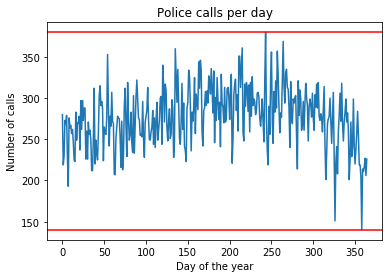

In [13]:
day = [0]*366
for i in crime['DATE']:
    day[int(i.strftime("%j"))] += 1
day = day[1:367]

plt.plot(day)
plt.title("Police calls per day")
plt.xlabel("Day of the year")
plt.ylabel("Number of calls")

# maximum
date = datetime(2017, 1, 1) + timedelta(day.index(max(day)))
print("Day with highest number of police calls was",date.strftime("%d.%m.%Y"),"with",max(day),"calls.")

# minimum
date = datetime(2017, 1, 1) + timedelta(day.index(min(day)))
print("Day with lowest number of police calls was",date.strftime("%d.%m.%Y"),"with",min(day),"calls.")

plt.axhline(y=max(day),color="red")
plt.axhline(y=min(day),color="red")

plt.show()

##### Average number of police calls per day

In [14]:
print("On average there were",(round(len(crime)/365))," calls per day in 2017.")
print("On average there were",(round(len(crime)/52)),"calls per week in 2017.")
print("On average there were",(round(len(crime)/12)),"calls per month in 2017.")

On average there were 277  calls per day in 2017.
On average there were 1942 calls per week in 2017.
On average there were 8417 calls per month in 2017.


##### Police calls by month

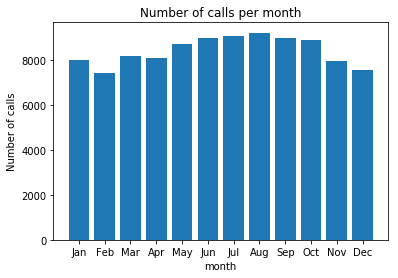

Month with highest number of police calls was Aug with 9213 calls.
Month with lowest  number of police calls was Feb with 7409 calls.


In [15]:
month = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in crime['MONTH']:
    month[i] += 1
month = month[1:13]
objects = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
y_pos = np.arange(len(objects))
plt.bar(y_pos,month)
plt.xticks(y_pos, objects)
plt.title("Number of calls per month")
plt.xlabel("month")
plt.ylabel("Number of calls")
plt.show()

print("Month with highest number of police calls was",objects[month.index(max(month))],"with",max(month),"calls.")
print("Month with lowest  number of police calls was",objects[month.index(min(month))],"with",min(month),"calls.")

##### Police calls per day of the week

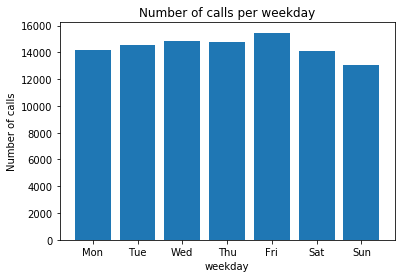

Weekday with highest number of police calls was Fri with 15470 calls.
Weekday with lowest  number of police calls was Sun with 13031 calls.


In [16]:
wd = [0,0,0,0,0,0,0,0]
for i in crime['DATE']:
    wd[int(i.strftime("%u"))] += 1
objects = ('Mon','Tue','Wed','Thu','Fri','Sat','Sun')
y_pos = np.arange(len(objects))
wd = wd[1:8]
plt.bar(y_pos,wd)
plt.xticks(y_pos, objects)
plt.title("Number of calls per weekday")
plt.xlabel("weekday")
plt.ylabel("Number of calls")
plt.show()

print("Weekday with highest number of police calls was",objects[wd.index(max(wd))],"with",max(wd),"calls.")
print("Weekday with lowest  number of police calls was",objects[wd.index(min(wd))],"with",min(wd),"calls.")

##### Police calls per hour of the day

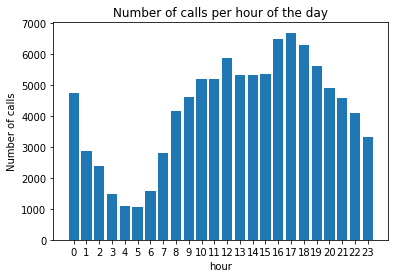

Hour with highest number of police calls was 17 with 6687 calls.
Hour with lowest  number of police calls was  5 with 1045 calls.


In [17]:
hr = [0]*24
for i in crime['HOUR']:
    hr[i] += 1
objects = (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
y_pos = np.arange(len(objects))
plt.bar(y_pos,hr)
plt.xticks(y_pos, objects)
plt.title("Number of calls per hour of the day")
plt.xlabel("hour")
plt.ylabel("Number of calls")
plt.show()

print("Hour with highest number of police calls was",objects[hr.index(max(hr))],"with",max(hr),"calls.")
print("Hour with lowest  number of police calls was ",objects[hr.index(min(hr))],"with",min(hr),"calls.")

##### Type of calls (top 15)

AxesSubplot(0.125,0.125;0.775x0.755)


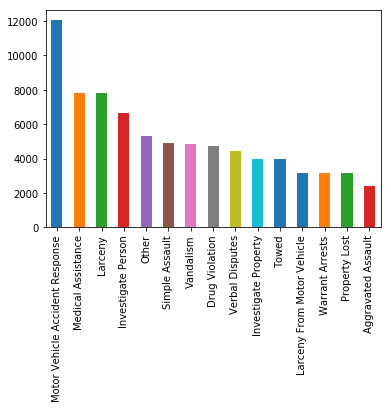

In [18]:
print(crime['OFFENSE_CODE_GROUP'].value_counts().head(15).plot(kind='bar'))

In [19]:
print(crime['OFFENSE_CODE_GROUP'].value_counts().index.tolist()[0],
      "is the most common call type with about",
      round(crime['OFFENSE_CODE_GROUP'].value_counts().max()/len(crime),4)*100,
      "% of all calls.")

print("Second most call type is",crime['OFFENSE_CODE_GROUP'].value_counts().index.tolist()[1],
      "with about",
      round(crime['OFFENSE_CODE_GROUP'].value_counts().head(2)[1]/len(crime),4)*100,
      "% of all calls.")

Motor Vehicle Accident Response is the most common call type with about 11.93 % of all calls.
Second most call type is Medical Assistance with about 7.739999999999999 % of all calls.


#### SHOOTINGS
At some police calls there are shootings (either because the police is called to shootings, or shootings occur when the police is entering the scene) 

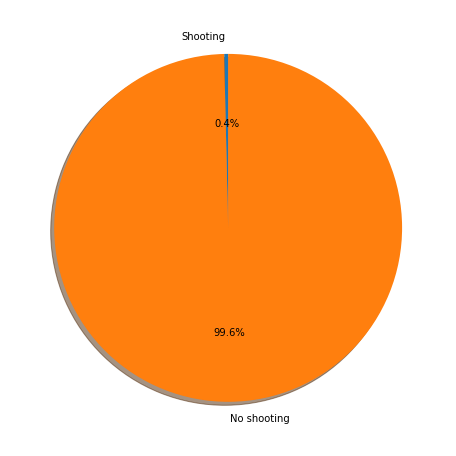

In [20]:
labels = 'Shooting', 'No shooting'
sh = 0
nsh = 0
for i in crime['SHOOTING']:
    if(i == "Y"):
        sh += 1
    else:
        nsh += 1
sizes = [sh,nsh]

# set optimal figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

In [21]:
print("There were",sh,"shootings in Boston in the year 2017.")

There were 370 shootings in Boston in the year 2017.


In [22]:
# reset default fig size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

> For the incidents with shootings we can look again at the number of calls as we did in the last 4 charts.

##### Number of police calls per day

Day with highest number of police calls was 20.12.2017 with 10 calls.
There were 210 days without any shooting in Boston


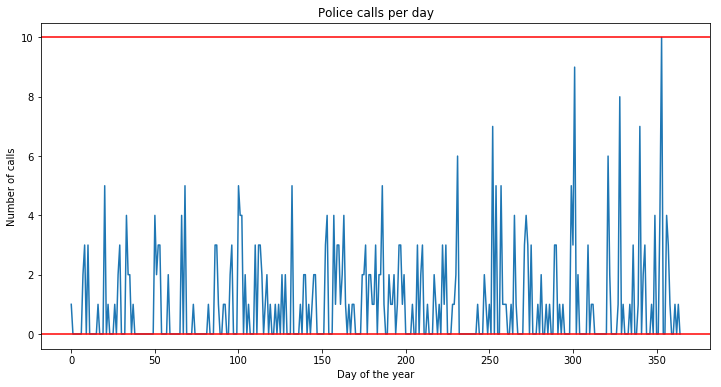

In [23]:
day = [0]*366
for i in crime['DATE'][crime.SHOOTING=='Y']:
    day[int(i.strftime("%j"))] += 1
day = day[1:367]

plt.plot(day)
plt.title("Police calls per day")
plt.xlabel("Day of the year")
plt.ylabel("Number of calls")

# maximum
date = datetime(2017, 1, 1) + timedelta(day.index(max(day)))
print("Day with highest number of police calls was",date.strftime("%d.%m.%Y"),"with",max(day),"calls.")

print("There were",day.count(0),"days without any shooting in Boston")

plt.axhline(y=max(day),color="red")
plt.axhline(y=min(day),color="red")

plt.show()

##### Average number of police calls per day with shootings

In [24]:
print("On average there were",(round(len(crime[crime.SHOOTING=='Y'])/365,2))," calls with shootings per day in 2017.")
print("On average there were",(round(len(crime[crime.SHOOTING=='Y'])/52,2))," calls with shootings per week in 2017.")
print("On average there were",(round(len(crime[crime.SHOOTING=='Y'])/12,2)),"calls with shootings per month in 2017.")

On average there were 1.01  calls with shootings per day in 2017.
On average there were 7.12  calls with shootings per week in 2017.
On average there were 30.83 calls with shootings per month in 2017.


##### Police calls by month

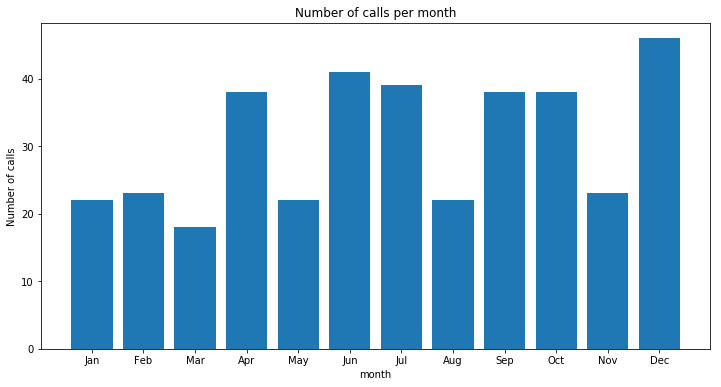

Month with highest number of police calls was Dec with 46 calls.
Month with lowest  number of police calls was Mar with 18 calls.


In [25]:
month = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in crime['MONTH'][crime.SHOOTING=='Y']:
    month[i] += 1
month = month[1:13]
objects = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
y_pos = np.arange(len(objects))
plt.bar(y_pos,month)
plt.xticks(y_pos, objects)
plt.title("Number of calls per month")
plt.xlabel("month")
plt.ylabel("Number of calls")
plt.show()

print("Month with highest number of police calls was",objects[month.index(max(month))],"with",max(month),"calls.")
print("Month with lowest  number of police calls was",objects[month.index(min(month))],"with",min(month),"calls.")

##### Police calls per day of the week

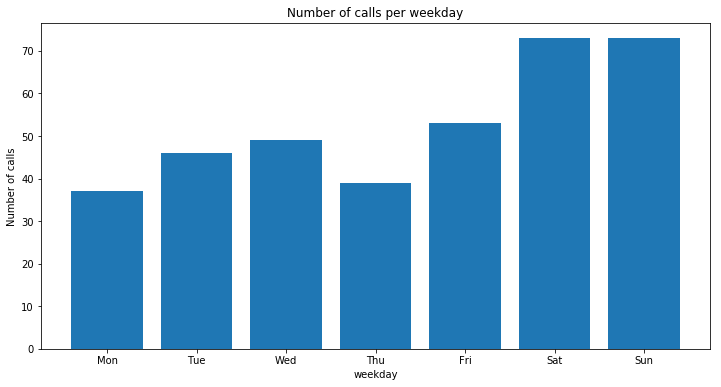

Weekday with highest number of police calls was Sat with 73 calls.
Weekday with lowest  number of police calls was Mon with 37 calls.


In [26]:
wd = [0,0,0,0,0,0,0,0]
for i in crime['DATE'][crime.SHOOTING=='Y']:
    wd[int(i.strftime("%u"))] += 1
objects = ('Mon','Tue','Wed','Thu','Fri','Sat','Sun')
y_pos = np.arange(len(objects))
wd = wd[1:8]
plt.bar(y_pos,wd)
plt.xticks(y_pos, objects)
plt.title("Number of calls per weekday")
plt.xlabel("weekday")
plt.ylabel("Number of calls")
plt.show()

print("Weekday with highest number of police calls was",objects[wd.index(max(wd))],"with",max(wd),"calls.")
print("Weekday with lowest  number of police calls was",objects[wd.index(min(wd))],"with",min(wd),"calls.")

##### Police calls per hour of the day

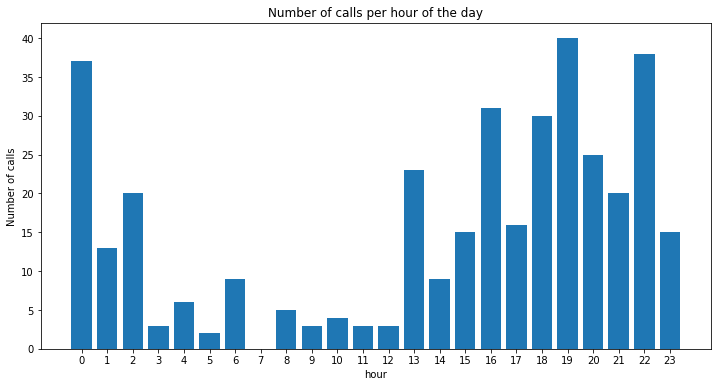

Hour with highest number of police calls was 19 with 40 calls.
Hour with lowest  number of police calls was 7 with 0 calls.


In [27]:
hr = [0]*24
for i in crime['HOUR'][crime.SHOOTING=='Y']:
    hr[i] += 1
objects = (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
y_pos = np.arange(len(objects))
plt.bar(y_pos,hr)
plt.xticks(y_pos, objects)
plt.title("Number of calls per hour of the day")
plt.xlabel("hour")
plt.ylabel("Number of calls")
plt.show()

print("Hour with highest number of police calls was",objects[hr.index(max(hr))],"with",max(hr),"calls.")
print("Hour with lowest  number of police calls was",objects[hr.index(min(hr))],"with",min(hr),"calls.")

### LOCATION OF CALLS

##### Locations of all calls

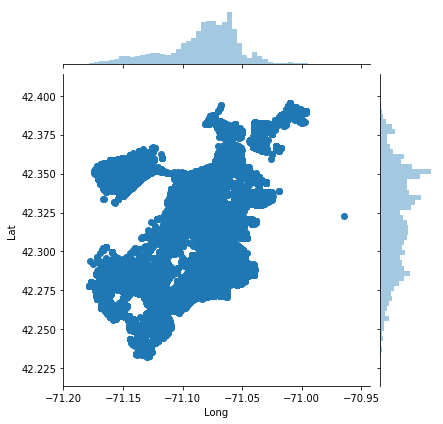

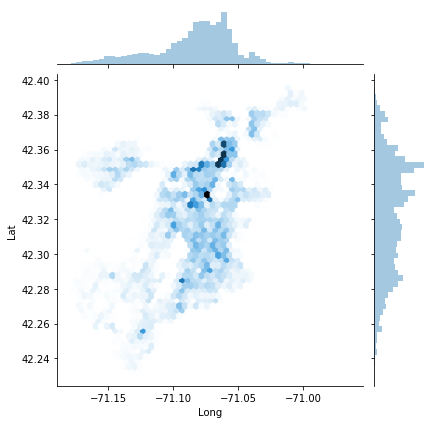

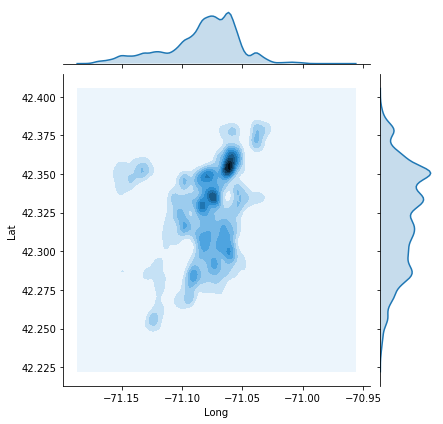

In [28]:
location = crime[['Lat','Long']]

location = location.loc[(location['Lat']>40) & (location['Long'] < -60)]  

x = location['Long']
y = location['Lat']

sns.jointplot(x, y, kind='scatter')
sns.jointplot(x, y, kind='hex')
sns.jointplot(x, y, kind='kde')

##### Location of calls with shootings 

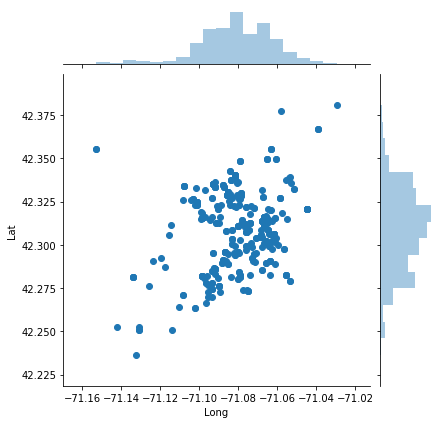

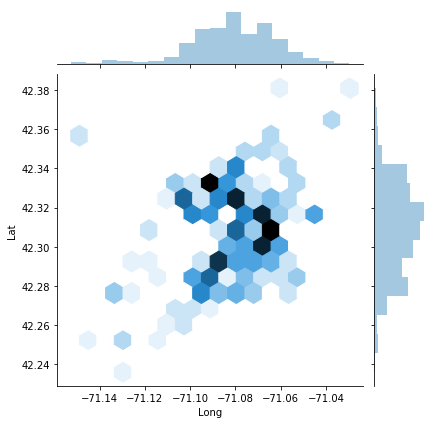

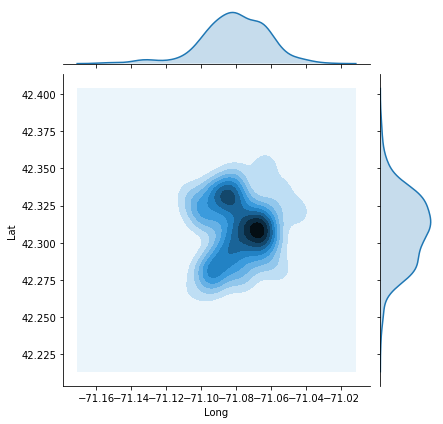

In [29]:
location_mvar = crime[crime.SHOOTING=='Y'][['Lat','Long']]

location_mvar = location_mvar.loc[(location_mvar['Lat']>40) & (location_mvar['Long'] < -60)]  

x_mvar = location_mvar['Long']
y_mvar = location_mvar['Lat']

sns.jointplot(x_mvar, y_mvar, kind='scatter')
sns.jointplot(x_mvar, y_mvar, kind='hex')
sns.jointplot(x_mvar, y_mvar, kind='kde')

##### Location of calls for Motor Vehicle Accident Responses on monday mornings (between 6 and 8 a.m.)

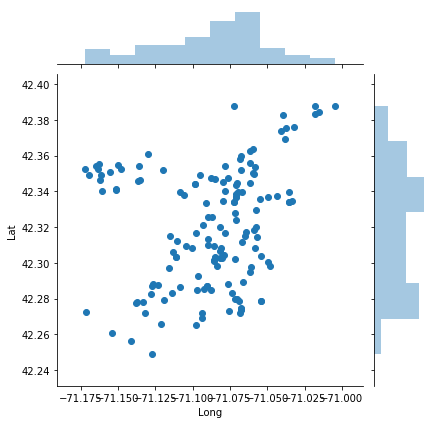

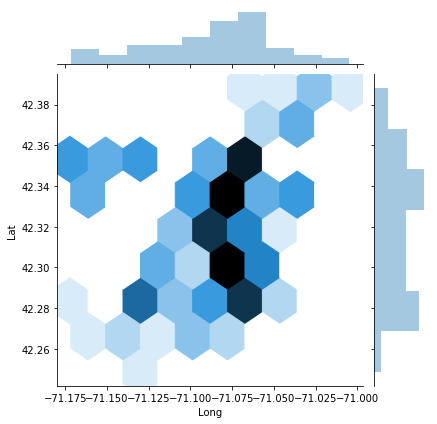

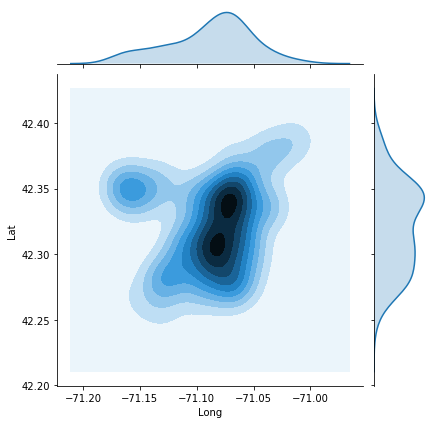

In [30]:
location_mvar = crime[(crime.OFFENSE_CODE_GROUP=='Motor Vehicle Accident Response') & (crime.HOUR>6) & (crime.HOUR<9) & (crime.DAY_OF_WEEK=='Monday')][['Lat','Long']]

location_mvar = location_mvar.loc[(location_mvar['Lat']>40) & (location_mvar['Long'] < -60)]  

x_mvar = location_mvar['Long']
y_mvar = location_mvar['Lat']

sns.jointplot(x_mvar, y_mvar, kind='scatter')
sns.jointplot(x_mvar, y_mvar, kind='hex')
sns.jointplot(x_mvar, y_mvar, kind='kde')

##### Locations for different call types 
* Motor Vehicle Accident
* Medical Assistance
* Drug Violation
* Larceny

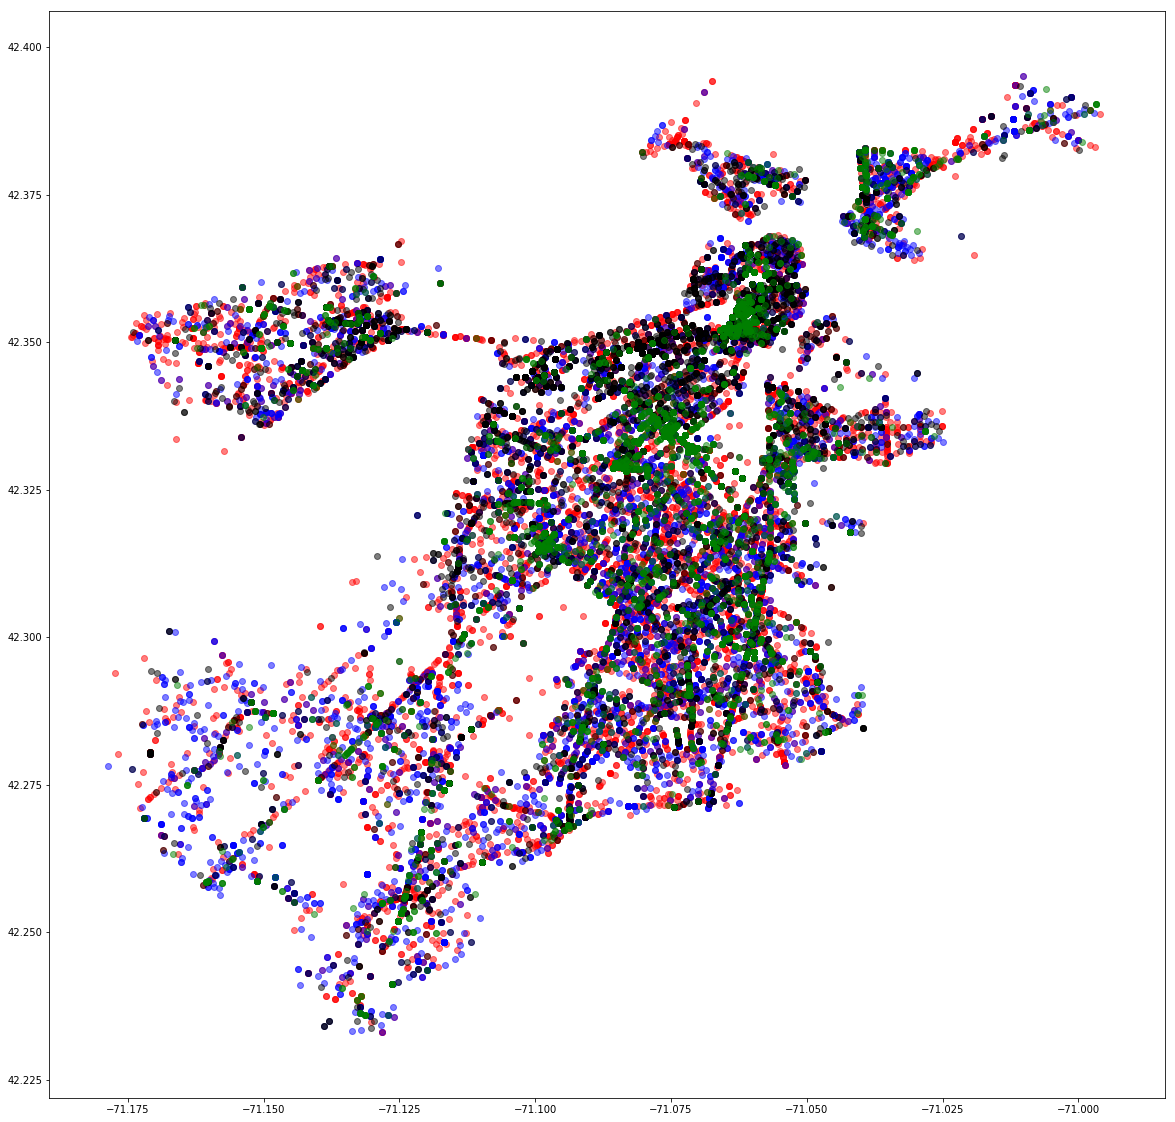

In [31]:
location_mv = crime[['Lat','Long']][(crime.Location!='(0.00000000, 0.00000000)') & (crime.OFFENSE_CODE_GROUP=='Motor Vehicle Accident Response')]
location_mv = location_mv.loc[(location_mv['Lat']>40) & (location_mv['Long'] < -60)]  
x_mv = location_mv['Long']
y_mv = location_mv['Lat']

location_ma = crime[['Lat','Long']][(crime.Location!='(0.00000000, 0.00000000)') & (crime.OFFENSE_CODE_GROUP=='Medical Assistance')]
location_ma = location_ma.loc[(location_ma['Lat']>40) & (location_ma['Long'] < -60)]  
x_ma = location_ma['Long']
y_ma = location_ma['Lat']

location_dv = crime[['Lat','Long']][(crime.Location!='(0.00000000, 0.00000000)') & (crime.OFFENSE_CODE_GROUP=='Drug Violation')]
location_dv = location_dv.loc[(location_dv['Lat']>40) & (location_dv['Long'] < -60)]  
x_dv = location_dv['Long']
y_dv = location_dv['Lat']

location_la = crime[['Lat','Long']][(crime.Location!='(0.00000000, 0.00000000)') & (crime.OFFENSE_CODE_GROUP=='Larceny')]
location_la = location_la.loc[(location_la['Lat']>40) & (location_la['Long'] < -60)]  
x_la = location_la['Long']
y_la = location_la['Lat']

plt.figure(figsize=(20,20))
plt.scatter(x_mv, y_mv,c='red',marker="o", alpha=0.5)
plt.scatter(x_ma, y_ma,c='blue',marker="o", alpha=0.5)
plt.scatter(x_la, y_la,c='black',marker="o", alpha=0.5)
plt.scatter(x_dv, y_dv,c='green',marker="o", alpha=0.5)
plt.show()

##### Interactive plot
> Click on the legends to display/remove the points of this category

In [32]:
# Create a trace
trace_mv = go.Scatter(
    x = x_mv,
    y = y_mv,
    mode = 'markers',
    name='Motor Vehicle Accidents',
    marker = dict(
        size = 4
    )
)
trace_ma = go.Scatter(
    x = x_ma,
    y = y_ma,
    mode = 'markers',
    name='Medical Assistance',
    marker = dict(
        size = 4
    )
)
trace_dv = go.Scatter(
    x = x_dv,
    y = y_dv,
    mode = 'markers',
    name='Drug Violation',
    marker = dict(
        size = 4
    )
)
trace_la = go.Scatter(
    x = x_la,
    y = y_la,
    mode = 'markers',
    name='Larceny',
    marker = dict(
        size = 4
    )
)

data = [trace_la,trace_ma,trace_mv,trace_dv]
layout = go.Layout(
    autosize=False,
    width=1000,
    height=1000,
    xaxis=dict(
        range=[-71.2, -71]
    ),
    yaxis=dict(
        range=[42.2, 42.4]
    )
)
# Plot and embed in ipython notebook!
fw = go.FigureWidget(data=data,layout=layout)
fw

FigureWidget({
    'data': [{'marker': {'size': 4},
              'mode': 'markers',
              'name': 'La…

We can see that for the different call types, some specific geographical pattern is visible.<br>
E.g. Motor Vehicle Accidents occurred on the large streets of Boston and so the dots somehow build lines and represent the street network of Boston in a way. <br>
Drug violation builds clusters of hotspots in some regions.<br>
<br>
<br>


----------
# CORRELATIONS BETWEEN ATTRIBUTES

In [45]:
hour_of_day = crime.loc[:,'HOUR']

offense_code = crime.loc[:,'OFFENSE_CODE']

#offense_code_group_comp = [for ocg in offense_code_group]

np.corrcoef(hour_of_day, offense_code)

INCIDENT_NUMBER
I182104193       1102
I182104155       1107
I182102504       1106
I182102468       2403
I182102438       1102
I182102218       3201
I182099965       1107
I182099458       2629
I182098931       2610
I182097707       1001
I182097356       3201
I182097325       3201
I182095978       1107
I182094780       1107
I182094587       3201
I182094248       3114
I182094232       3201
I182094101       3201
I182093801       3110
I182093039       3201
I182092552       3201
I182092368       3201
I182091879        616
I182090944       1102
I182090757       3201
I182089429       3201
I182088635        619
I182088569       2629
I182087436        619
I182086168       3114
                 ... 
I152082187       3125
I152076581        802
I152076581       2405
I152076581       2647
I152076581       3125
I152065629       1810
I152065629       1849
I152065629       2610
I152065629       1874
I152046351        802
I152046351        413
I152046351       3125
I152028570-01    3125
I152026488-00   

<br>
<br>
<br>

--------
# CLUSTERING